In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Para ajustar datos

In [6]:
def cargar_datos(path, file):
    data = np.loadtxt(path+file, delimiter=",")
    lambda_, desplazamiento = data[:, 0], data[:, 1]
    return lambda_, desplazamiento


In [181]:
path = "../" + "23-03-2022_Part2" + "/" + "4x" + "/" + "30um" + "/" + "Envolventes" + "/"
filename = "seguimiento_envolvente_central1_1.dat"

x, y = cargar_datos(path=path, file=filename)

x_2, y_2 = cargar_datos(path=path, file=filename[:-5]+"2.dat")

#x_3, y_3 = cargar_datos(path=path, file=filename[:-5]+"3.dat")

# x contiene las longitudes de onda
# y contiene los desplazamientos


In [182]:
# Realizando ajuste

# Definicion del modelo a ajustar
def f(x, a, b):
    y = a*x+b
    return y


# Estimaciones iniciales de los parametros del modelo
p0 = [-20, 10000]
# Ajustando
pars, cov = curve_fit(
    f=f, xdata=x[:], ydata=y[:], p0=p0, bounds=(-np.inf, np.inf))
pars_2, cov_2 = curve_fit(
    f=f, xdata=x_2[:], ydata=y_2[:], p0=p0, bounds=(-np.inf, np.inf))
#pars_3, cov_3 = curve_fit(
#    f=f, xdata=x_3[:], ydata=y_3[:], p0=p0, bounds=(-np.inf, np.inf))

# Separando parametros
a, b = pars[:]
a_2, b_2 = pars_2[:]
#a_3, b_3 = pars_3[:]

# Tratamiento del error
# cov contiene la matriz de covarianzas, entonces, para obtener la desvest de cada parametro obtenemos
e_a, e_b = np.sqrt(np.diag(cov))
e_a_2, e_b_2 = np.sqrt(np.diag(cov_2))
#e_a_3, e_b_3 = np.sqrt(np.diag(cov_3))

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(1510, 1590, 0.1)
# Evaluando funcion ajustada
y_fit = f(x_fit, a, b)
y_fit_2 = f(x_fit, a_2, b_2)
#y_fit_3 = f(x_fit, a_3, b_3)


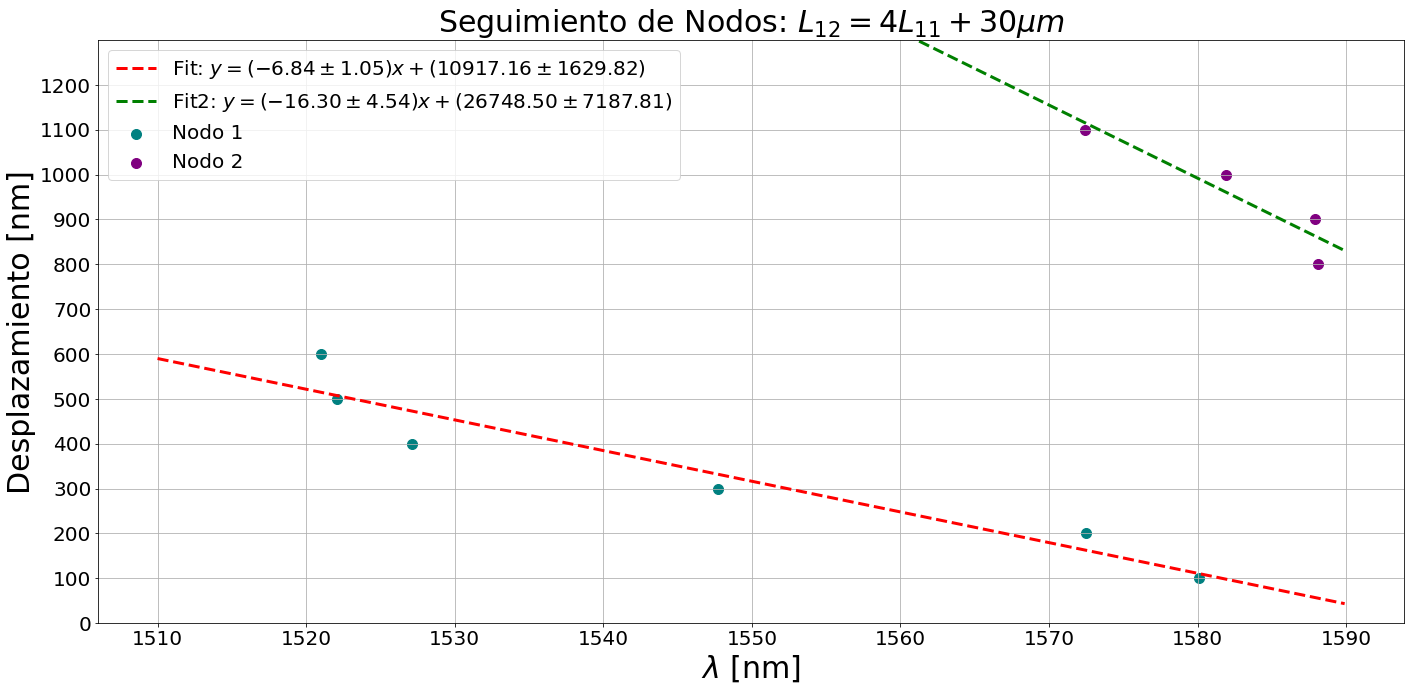

In [183]:

"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Seguimiento de Nodos: $L_{12} = 4L_{11} + 30\mu m$", fontsize=30)


graph_data = ax.scatter(x, y, s=400, marker=".", c="teal", label="Nodo 1")
graph_data_2 = ax.scatter(x_2, y_2, s=400, marker=".",c="purple", label="Nodo 2")
#graph_data_3 = ax.scatter(x_3,y_3, s=400, marker=".", c="blue", label = "Nodo 3")


graph_fit = ax.plot(x_fit, y_fit, c="red", linestyle="dashed",
linewidth=3, label=r"Fit: $y = (%.2f \pm %.2f )x + (%.2f \pm %.2f)$" % (a, e_a, b, e_b))
graph_fit_2 = ax.plot(x_fit, y_fit_2, c="green", linestyle="dashed",
linewidth=3, label=r"Fit2: $y = (%.2f \pm %.2f)x + (%.2f \pm %.2f)$"%(a_2,e_a_2,b_2,e_b_2))
#graph_fit_3 = ax.plot(x_fit, y_fit_3, c="orange", linestyle="dashed",
#linewidth=3, label=r"Fit3: $y = (%.2f \pm %.2f)x + (%.2f \pm %.2f)$"%(a_3,e_a_3,b_3,e_b_3))


ax.set_xlabel(r"$\lambda$ [nm]", fontsize=30)
ax.set_ylabel("Desplazamiento [nm]", fontsize=30)
ax.grid()
ax.set_yticks(np.arange(0, 1300, 100))
ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=20)
#plt.savefig(path + filename[0:-4]+".png")
plt.savefig(path + "seguimiento_envolvente_central1.png")
plt.show()


# Para separar datos de mediciones por columas 

Cada medicion esta separada por columnas, la primera columa es el dominio en $\lambda$ y las columnas restantes son mediciones de la potencia en dBm del interrogador

Se realizara la separacion en archivos para poder ajustar este formato a los codigos ya existentes

In [63]:
path = "/home/alejandro_goper/Descargas/espectros_alejandro_ref.dat"
data = np.loadtxt(path)
lambda_ = data[:, 0]


In [64]:
prefijo = "/home/alejandro_goper/Descargas/Espectro ("
# Ponemos los arreglos en formator especifico para añadir columna
# Vease: https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
lambda_ = lambda_.reshape((len(lambda_), 1))
# Para cada columna generaremos un archivo
for i in range(1, len(data[1]), 1):
    nombre = prefijo + str(i) + ").dat"
    data_r = data[:, int(i)]
    # Esta es la columna a agregar y debemos formatearla igual
    data_r = data_r.reshape((len(data_r), 1))
    # Agregamos columna en un solo array
    array = np.append(lambda_, data_r, axis=1)
    # Guardamos con formator float de 3 decimales de precision
    np.savetxt(nombre, array, fmt="%.3f")


# Para hallar el promedio y el error de las medicones de la longitud de los capilares

El error sera la desviacion estandar muestral 
El valor medido es el promedio 

In [12]:
path = "../Caracterizacion_capilares/16-02-2022/Capilar4/Longitud_mediciones.txt"
data = np.loadtxt(path, delimiter=",")
longitud = data[:, 1]


In [13]:
longitud_prom = np.mean(longitud)
longitud_std = np.std(longitud, ddof=1)
print("L = %.3f \nE_l = %.3f$" % (longitud_prom, longitud_std))


L = 1.892 
E_l = 0.006$
